In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
data=pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Preprocessing

In [3]:
data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [4]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# label encode gender column
label_encoder_gender=LabelEncoder()
data["Gender"] = label_encoder_gender.fit_transform(data['Gender'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# onehotencode geography column
from sklearn.preprocessing import OneHotEncoder
onehot_encoder_geography=OneHotEncoder()
geo_encoded=onehot_encoder_geography.fit_transform(data[["Geography"]])
geo_encoded.toarray().shape

(10000, 3)

In [10]:
onehot_encoder_geography.get_feature_names_out()

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [11]:
geo_encoded_df = pd.DataFrame(data=geo_encoded.toarray(),columns=onehot_encoder_geography.get_feature_names_out())

In [12]:
geo_encoded_df.head()

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [13]:
data_p = pd.concat([data,geo_encoded_df],axis=1)

In [14]:
data_p.shape

(10000, 14)

In [15]:
data_p.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [16]:
data_p = data_p.drop("Geography",axis=1)

In [17]:
data_p.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [18]:
# saving encoders
import pickle

with open("label_encoder_gender.pkl","wb") as file:
    pickle.dump(label_encoder_gender,file)

with open("onehot_encoder_geo.pkl","wb") as file: 
    pickle.dump(onehot_encoder_geography,file)

In [19]:
X = data_p.drop("Exited",axis=1)
y = data_p.Exited

In [20]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=2025)

In [22]:
X_train.shape

(8000, 12)

In [23]:
X_test.shape

(2000, 12)

In [24]:
y_train.shape

(8000,)

In [25]:
y_test.shape

(2000,)

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
with open("scaler.pkl","wb") as file:
    pickle.dump(scaler,file)

## ANN Implementation

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [29]:
(X_train.shape[1],)

(12,)

In [30]:
# Build the model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]
)

c:\Users\US593\.conda\envs\ccn\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Compile the model
opt=keras.optimizers.Adam(learning_rate=0.01)
loss=keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])
# can also use 
# model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
# for optimizer="adam" => lr = 0.1, so to have custom lr, use keras.optimizers.Adam(learning_rate=lr)

In [33]:
## Set up the Tensorboard
from keras.callbacks import EarlyStopping,TensorBoard
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

In [34]:
## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [35]:
## Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8129 - loss: 0.4358 - val_accuracy: 0.8535 - val_loss: 0.3571
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8503 - loss: 0.3632 - val_accuracy: 0.8545 - val_loss: 0.3575
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8557 - loss: 0.3417 - val_accuracy: 0.8610 - val_loss: 0.3459
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3422 - val_accuracy: 0.8610 - val_loss: 0.3515
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8628 - loss: 0.3336 - val_accuracy: 0.8610 - val_loss: 0.3643
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3521 - val_accuracy: 0.8585 - val_loss: 0.3488
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8643 - loss: 0.3323 - val_accuracy: 0.8590 - val_loss: 0.3543
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8597 - loss: 0.3395 - val_accu

In [36]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

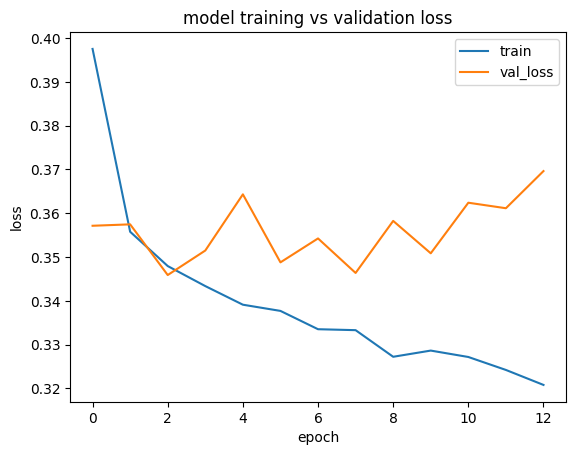

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model training vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val_loss'])
plt.show()

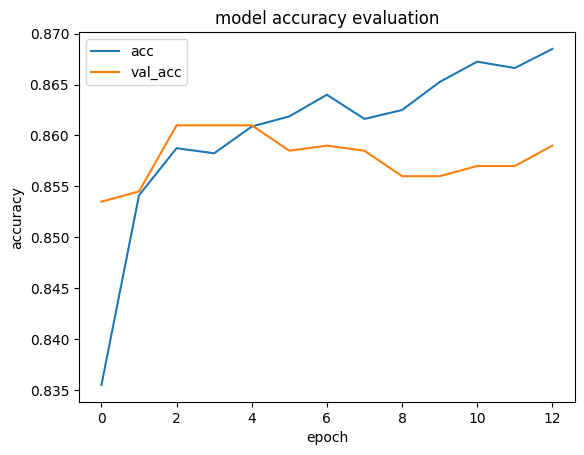

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy evaluation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])
plt.show()

In [39]:
# ## Load Tensorboard Extension
# %load_ext tensorboard

In [40]:
# %tensorboard --logdir logs/fit

In [41]:
# Save the model
model.save("model.h5")